In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_data = np.arange(0,np.pi*2, 0.1)
correct_data = np.sin(input_data)
input_data = (input_data - np.pi) / np.pi # -1.0 ~ 1.0 으로 변환
n_data = len(correct_data)

In [64]:
n_in = 1
n_mid = 5
n_out = 1 #입력, 은닉, 출력의 뉴런 수를 정의

In [65]:
wb_width = 0.01

In [66]:
eta = 0.1 #학습률
epoch = 2001 #맨 마지막 epoch가 2000까지 나오게
interval = 200 # 200마다 확인

np.random.randn(m,n) : 평균 0, 표준편차 1의 표준정규분포 난수  nadarray(m,n) 생성

In [67]:
class OutputLayer:
    def __init__(self, n_upper, n): #이전층의 노드의 개수 현재의 노드개수
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u #항등함수니까 그대로 저장
        
    def backward(self, t):
        #t는 타켓 즉, 정답
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [68]:
class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
    
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/ (1+np.exp(-u)) #시그모이드 함수니까 변경
    
    def backward(self, grad_y):
        # 이전출력을 미분한 기울기 값을 매개변수로 넣음
        delta = grad_y * (1-self.y) * self.y
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [69]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

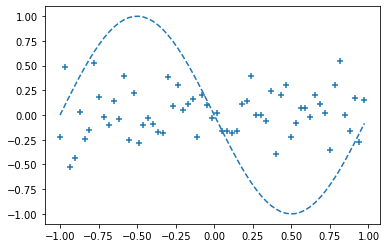

Epoch: 0/2001 Error : 0.28382199200064173


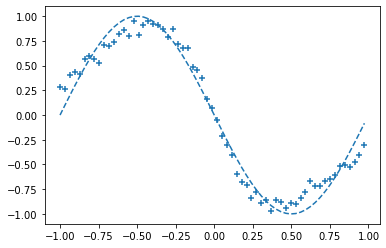

Epoch: 200/2001 Error : 0.007417176272361793


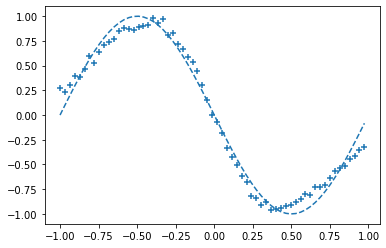

Epoch: 400/2001 Error : 0.004862416860673442


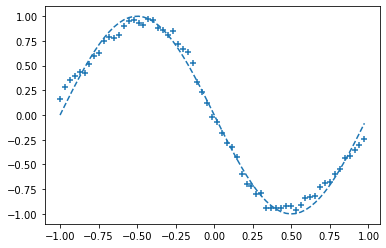

Epoch: 600/2001 Error : 0.0027507036447886627


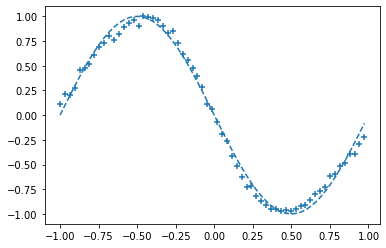

Epoch: 800/2001 Error : 0.0019180528873416968


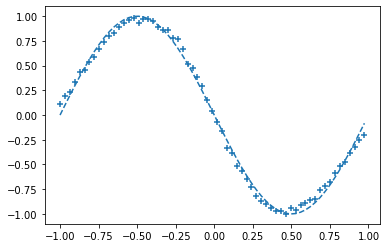

Epoch: 1000/2001 Error : 0.001200524980271857


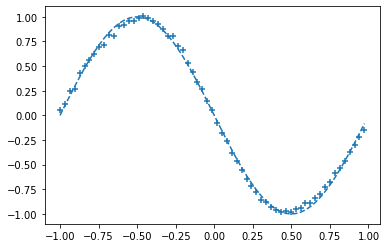

Epoch: 1200/2001 Error : 0.0005794022107196714


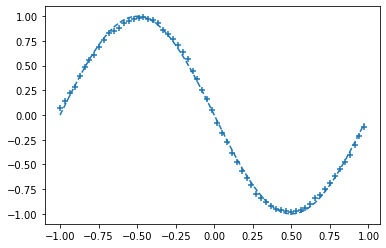

Epoch: 1400/2001 Error : 0.00037134933211444503


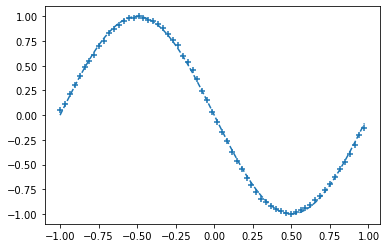

Epoch: 1600/2001 Error : 0.00018319086106514447


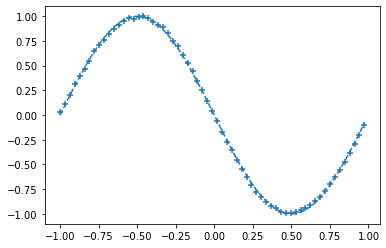

Epoch: 1800/2001 Error : 9.898555149431861e-05


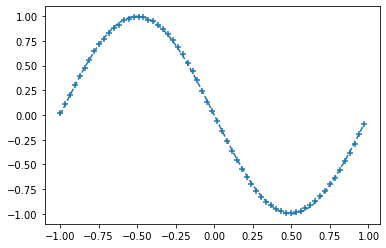

Epoch: 2000/2001 Error : 5.219570717879664e-05


In [70]:
for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        x = input_data[idx]
        t = correct_data[idx]
        
        #순전파
        middle_layer.forward(x.reshape(1, 1))
        output_layer.forward(middle_layer.y)
        
        #역전파
        output_layer.backward(t.reshape(1,1))
        middle_layer.backward(output_layer.grad_x)
        
        #w, b 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1)
            
            total_error += 1.0/2.0 * np.sum(np.square(y-t))
            plot_x.append(x)
            plot_y.append(y)
            
    if i % interval == 0:
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        
        print('Epoch: ' + str(i) + '/' +str(epoch), 'Error : ' +str(total_error/n_data))
        